In [1]:
from src.functions import *

**Problema 5**: A constante de Stefan-Boltzman, $\sigma$, relaciona a energia total emitida por um corpo negro com a sua temperatura. Ela é dada por

$$
\sigma=\frac{\pi^2k_b^4}{60\hbar^3c^2}\zeta(4),
$$
onde $\zeta(s)$ é função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma na forma integral:
$$
\zeta(s)=\frac{1}{\Gamma(s)}\int_0^{\infty}\frac{x^{s-1}e^{-x}}{1-e^{-x}}dx,
$$
onde $\Gamma(s)=(s-1)!$ é a função Gamma. Utilizando *importance sampling*, gere amostras aleatórias de $x$ de uma distribuição exponencial, $\omega(x)=e^{-x}$ para $x\ge0$, que corresponde ao termo $e^{-x}$ no integrando. Reescreva a integral como
$$
\zeta(s)=\frac{1}{\Gamma(s)}\mathbb{E}\left[\frac{x^{s-1}}{1-e^{-x}}dx\right].
$$
Compare seu resultado de Monte Carlo com o valor exato:
$$
\zeta(4)=\frac{\pi^4}{90}.
$$

In [7]:
# Distribuição de Boltzmann (não-normalizada)
def P(x):
    return (2*np.pi/3)+(np.cos(x))**2

# Distribuição proposta (uniforme) no intervalo [-a, a]
#a = 1
#a = 3
# def g(a, x):
#     return 1 / (2 * a) if -a <= x <= a else 0
def g(x):
    return 1 / (2)

def P_teorica(x):
    return (2*np.pi/3)+(np.cos(x))**2

# Rejection Sampling

def rejection_sampling(n_samples, M):
    """
    Função irá filtrar um número n_samples desejados, dentro do intervalo [-a, a], seguindo o critério proposto no rejection_samples, onde:
    x_proposto é aceito, se, um número u gerado de forma uniforme for tal que u <= P(x_proposto)/(M * g(x_proposto)), com M sendo uma constante
    de tal forma que Mg(x) > P(x), para que a função g(x) englobe a distribuição de interesse.
    
    args:
        n_samples (int): número de amostras desejados
        a (int): intervalo simétrico de intereresse
    """
    
    
    samples = []
    
    # Valor de M que faz com que Mg(x) >= P(x) para todos x no intervalo de interesse [-a, a]
    #M = max([P(y) / g(a, y) for y in np.linspace(-a, a, 1000) if g(a, y) != 0])
    
    while len(samples) < n_samples:
        # Amostra da proposta
        x_prop = random.uniform(0, np.pi)
        u = random.uniform(0, 1)
        
        # Verificar aceitação
        if u <= P(x_prop) / (M * g(x_prop)) and g(x_prop) != 0:
            samples.append(x_prop)
    
    return samples

# Função para calcular a distribuição (Pk) e os valores de k
def distribution_data(samples, m):
    # Construir os bins e calcular as distribuições
    """
    Calcula a distribuição normalizada a partir dos dados propostos

    args:
        samples (list): valores aceitos pelo método de rejection_samples.
        a (float): valor utilizado no intervalo simétrico que iremos analisar [-a, a].
        m (int): número de pontos utilizados na discretização no eixo x.
    
    """
    #m = 100 # Número de pontos utilizados na discretização do eixo x
    x = np.linspace(0, np.pi, m) 
    bins = [(float(x[i]), float(x[i+1])) for i in range(m-1)]
    count_values = [0 for i in range(m - 1)]

    # Contando valores de samples dentro dos intervalos de bins
    for sample in samples:
        for i, (start, end) in enumerate(bins):
            if start <= sample < end:  # Verifica se a amostra está no intervalo
                count_values[i] += 1   # Se o valor estiver dentro do intervalo, atualiza a contagem
                break  # Sai do loop assim que o intervalo correto for encontrado

    # Calculando largura dos bins (assumimos largura constante)
    bin_width = bins[0][1] - bins[0][0]

    # Como possuímos bins igualmente espaçados (step), devemos normalizar considerando a largura dos bins
    total_count = sum(count_values)
    Pk_data = [(count / (total_count * bin_width)) for count in count_values]  # Densidade
    k_data = [(bin[1] + bin[0]) / 2 for bin in bins]  # Centros dos bins

    # Filtrando para remover zeros
    filtered_k_data = [k for k, pk in zip(k_data, Pk_data) if pk > 0]
    filtered_Pk_data = [pk for pk in Pk_data if pk > 0]

    return filtered_k_data, filtered_Pk_data


In [2]:
def P(x):
    return ((2/(3*np.pi))*(1+x**2))/np.sqrt(1-x**2)
    #return ((2/(3*np.pi))*(1+(np.cos(x))**2))/np.sin(x)
    #return (1+(np.cos(x))**2)
    #x=np.cos(x)
    #return (1+x**2)
n_samples = 10**5
M = 50
#a=0
#b=np.pi
a=-1
b=1

# Retorna lista de valores aceitos
#def rejection_sampling(n_samples, a, b, M, P, g):
#samples = rejection_sampling(n_samples, M)
samples = rejection_sampling(n_samples, a, b, M, P, g)

print('Amostras aceitas para distribuição de Boltzmann (Rejection samples)')
#print(samples)

Amostras aceitas para distribuição de Boltzmann (Rejection samples)


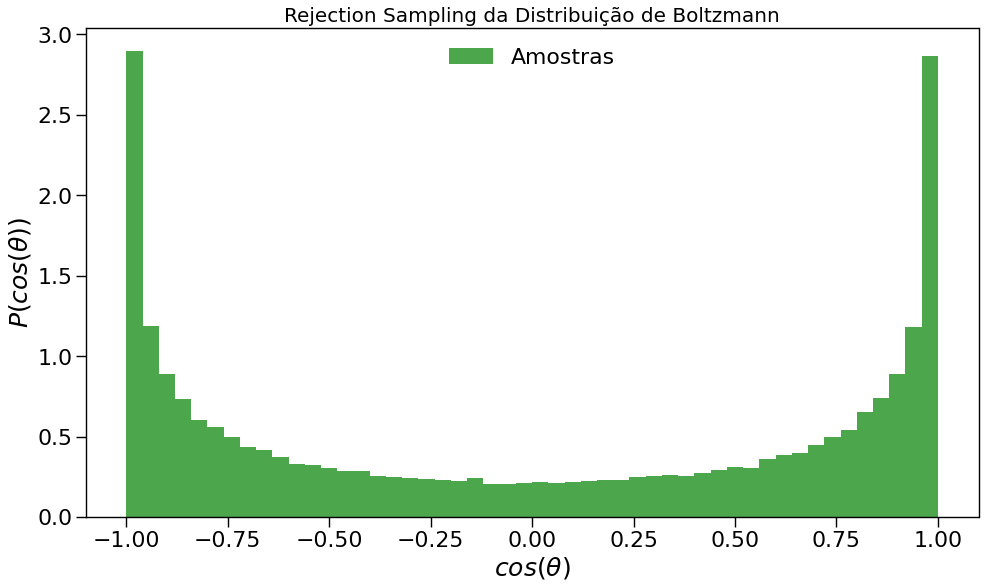

In [3]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
k_data, Pk_data = distribution_data(samples, a, b, m)
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
#plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$cos(\theta)$", size=25)
plt.ylabel(r"$P(cos(\theta))$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()

In [10]:
def P(x):
    return ((2/(3*np.pi))*(1+(np.cos(x))**2))
n_samples = 10**6
M = 100
a=0
b=np.pi


# Retorna lista de valores aceitos
#def rejection_sampling(n_samples, a, b, M, P, g):
#samples = rejection_sampling(n_samples, M)
samples = rejection_sampling(n_samples, a, b, M, P, g)

print('Amostras aceitas para distribuição de Boltzmann (Rejection samples)')
#print(samples)

Amostras aceitas para distribuição de Boltzmann (Rejection samples)


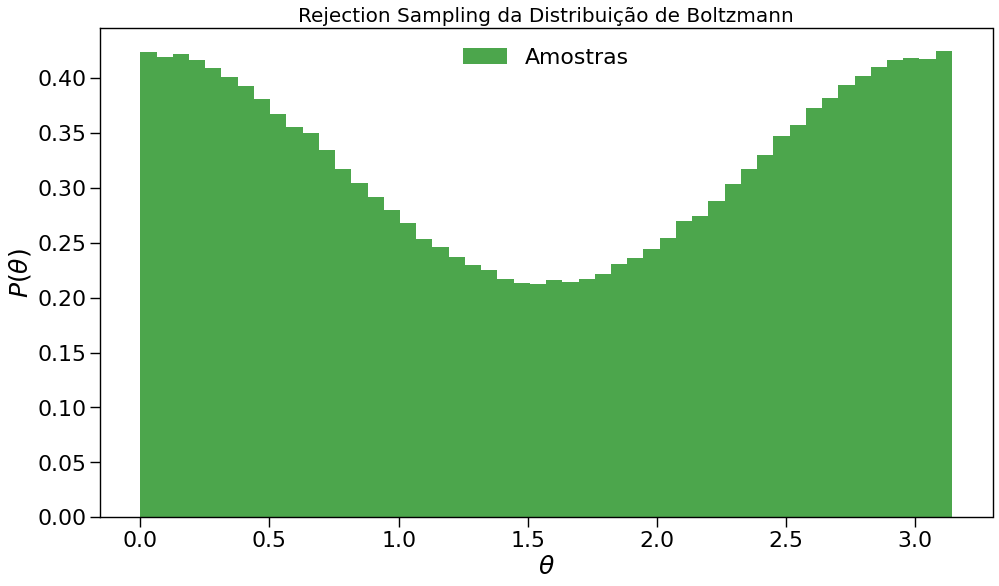

In [11]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
k_data, Pk_data = distribution_data(samples, a, b, m)
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
#plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$\theta$", size=25)
plt.ylabel(r"$P(\theta)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()

In [14]:
def P(x):
    return ((2/(3*np.pi))*(1+x**2))
n_samples = 10**6
M = 100
a=-1
b=1


# Retorna lista de valores aceitos
#def rejection_sampling(n_samples, a, b, M, P, g):
#samples = rejection_sampling(n_samples, M)
samples = rejection_sampling(n_samples, a, b, M, P, g)

print('Amostras aceitas para distribuição de Boltzmann (Rejection samples)')
#print(samples)

Amostras aceitas para distribuição de Boltzmann (Rejection samples)


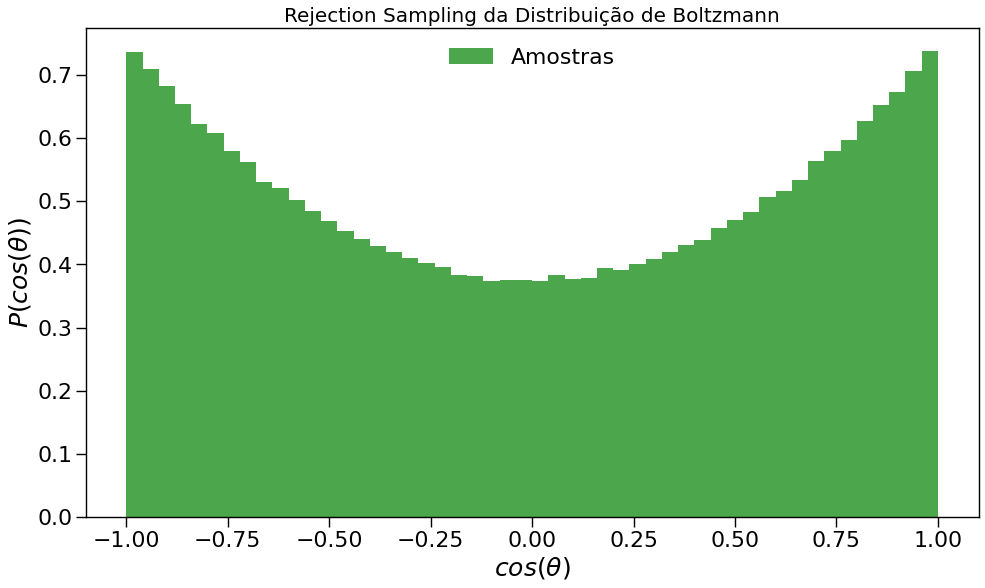

In [15]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
k_data, Pk_data = distribution_data(samples, a, b, m)
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
#plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$cos(\theta)$", size=25)
plt.ylabel(r"$P(cos(\theta))$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()

In [14]:
E = np.mean(samples) # Valor esperado das amostras (média)
var = np.var(samples) # Variância das amostras

E_teo = np.pi/2 # Valor esperado teórico
var_teo = (2/(3*np.pi))*(((np.pi)**3)/3+(np.pi**3)/6)-(np.pi/2)**2 # Variância teórica

Err_E = abs(E - E_teo)
Err_var = abs(var - var_teo)

print(f'E_medido = {E}, E_teórico = {E_teo}, Erro_Absoluto = {Err_E}')
print(f'var_medido = {var}, var_teórico = {var_teo}, Erro_Absoluto = {Err_var}')

E_medido = 1.570234304085609, E_teórico = 1.5707963267948966, Erro_Absoluto = 0.000562022709287513
var_medido = 0.9185535723992078, var_teórico = 0.8224670334241133, Erro_Absoluto = 0.09608653897509445
